# Practica 2

## Regresión Logística

En esta practica usaremos los datos de ejemplo proporcionados que representan las notas de los alumnos que se presentaron a un examen de admision a la universidad junto con la informacion sobre si fueron (1) o no (0) admitidos.
El objetivo de la práctica es construir un modelo por regresión logística que estime la probabilidad de que un estudiante sea admitido en esa universidad en base a las notas de sus exámenes.

## INCLUDES

In [13]:
import numpy as np
from pandas.io.parsers import read_csv 
import math as mt
import matplotlib.pyplot as plt
import scipy.optimize as opt

### Lectura de los datos de entrada

In [14]:
# Funcion que carga el fichero csv especificado y lo devuelve en un array de numpy
def carga_csv(file_name):
    valores = read_csv(file_name, header = None).values
    # suponemos que siempre trabajaremos con float     
    return valores.astype(float)

In [310]:
datos = carga_csv('ex2data1.csv')

#Notas examenes
results = datos[:, :-1]

#Notas examenes con columna de 1
datosExamenes = np.hstack([np.ones([results.shape[0], 1]), results])
#Indices de aprobados y suspensos
aceptados = datos[:, -1]

m = datosExamenes.shape[0]
n = datosExamenes.shape[1]

theta = np.zeros((1, n))

### Dibujado de los datos

Dibujamos los datos de los examenes para obtener un resultado mas visual

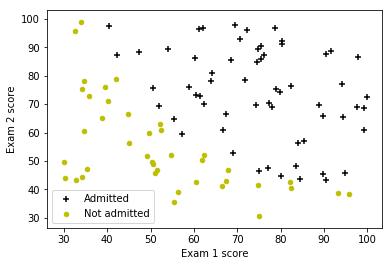

In [308]:
def dibuja_graf():
    #np.shape(results)
    pos0 = np.where(datos[:,-1] == 0)
    pos1 = np.where(datos[:, -1] == 1)
    
    plt.scatter(results[pos1, 0], results[pos1, 1], marker='+', c = 'k', s=30)
    plt.scatter(results[pos0, 0], results[pos0, 1], marker='o', c = 'y', s=20)
    plt.legend(['Admitted', 'Not admitted'])

    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    
dibuja_graf()

In [35]:
# Funcion sigmoide
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

### Funcion Coste
A continuacion implementamos la funcion coste

In [334]:
# Funcion Coste
def cost(theta, x, y):
    sig = sigmoide(np.dot(x, theta.T))
    
    logSig = np.log(sig)
    #logSigT = np.transpose(logSig)
    
    log1 = np.log((1 - sig))
    #log1T = np.transpose(log1)

    c = (-1/m) * (np.dot(y, logSig) + np.dot((1-y),log1))
    return c

def gradiente(theta, x, y):
    return (x.T.dot((sigmoide(x.dot(theta.T))) - y))/m

In [335]:
# Funcion para pintar la recta frontera
def pinta_frontera_recta(X, Y, theta):
    dibuja_graf()   
    x1_min, x1_max = X[:, 1].min(), X[:, 1].max()    
    x2_min, x2_max = X[:, 2].min(), X[:, 2].max()        
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),                           
                           np.linspace(x2_min, x2_max))        
    h = sigmoide(np.c_[np.ones((xx1.ravel().shape[0], 1)),
                      xx1.ravel(),
                      xx2.ravel()].dot(theta))
    h = h.reshape(xx1.shape)        
    # el cuarto parámetro es el valor de z cuya frontera se quiere pintar    
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')    

Una vez tenemos las funciones anteriores es momento de dibujar la grafica con la recta de la frontera.

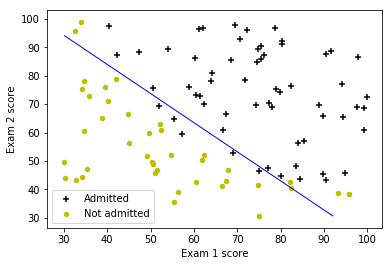

In [336]:
result = opt.fmin_tnc(func=cost , x0=theta , fprime=gradiente , args=(datosExamenes, aceptados)) 
theta_opt = result [0]

pinta_frontera_recta(datosExamenes, aceptados, theta_opt)

A continuacion implementaremos una funcion que calcule el porcentaje de ejemplos de entrenamiento que se clasifican correctamente sobre cada ejemplo de entrenamiento, interpretando si el resultado es >= 0.5 el alumno sera admitido (1) y si es menor no sera admitido(0)